In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../current_metadata_ena.tsv', sep='\t')
df.index = df.run_accession

/opt/hostedtoolcache/Python/3.8.5/x64/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,5,9,21,27,31,35,53,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
date = pd.read_csv('../accession_and_date.tsv', sep='\t', header=None)

In [4]:
date.columns = ['accession', 'date']

In [5]:
by_date = date.date.value_counts()

Text(0.5, 1.0, 'All published SRA/ENA accessions by date')

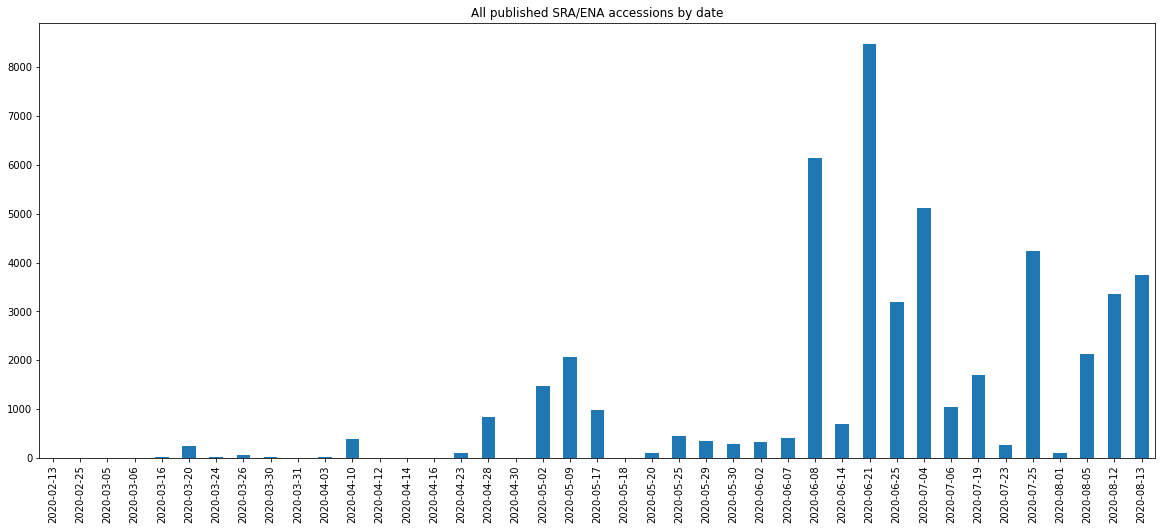

In [6]:
by_date.sort_index().plot(kind='bar', figsize=(20, 8)).set_title("All published SRA/ENA accessions by date")

In [7]:
date['is_sra'] = date.accession.str.startswith('SRR')

In [8]:
by_date_by_center = date.groupby(['date', 'is_sra']).count().reset_index()

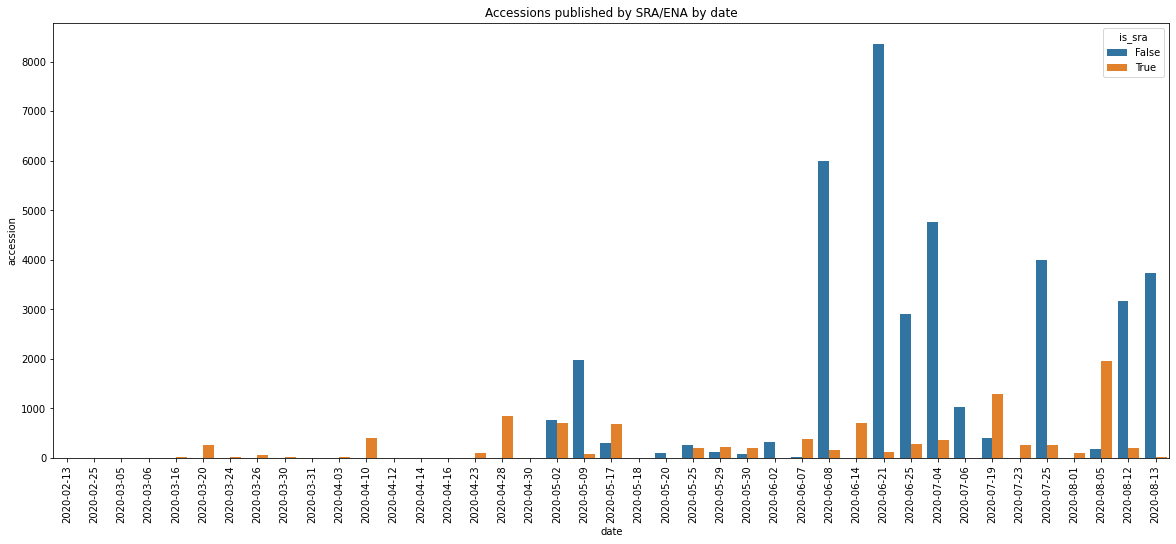

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x='date', y='accession', hue='is_sra', data=by_date_by_center, ax=ax)
ax.set_title('Accessions published by SRA/ENA by date')
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [10]:
instruments = df.groupby(['instrument_platform', 'instrument_model']).count()['accession'].reset_index()
instruments

,instrument_platform,instrument_model,accession
0,BGISEQ,BGISEQ-500,1
1,CAPILLARY,AB 3730xL Genetic Analyzer,7
2,ILLUMINA,Illumina HiSeq 1000,1
3,ILLUMINA,Illumina HiSeq 1500,13
4,ILLUMINA,Illumina HiSeq 2000,5
5,ILLUMINA,Illumina HiSeq 2500,2443
6,ILLUMINA,Illumina HiSeq 4000,56
7,ILLUMINA,Illumina MiSeq,7207
8,ILLUMINA,Illumina MiniSeq,39
9,ILLUMINA,Illumina NovaSeq 6000,6483


In [11]:
df.groupby(['library_strategy', 'instrument_platform']).count()['accession'].reset_index()

,library_strategy,instrument_platform,accession
0,AMPLICON,CAPILLARY,7
1,AMPLICON,ILLUMINA,25231
2,AMPLICON,ION_TORRENT,323
3,AMPLICON,OXFORD_NANOPORE,12063
4,OTHER,ILLUMINA,75
5,RNA-Seq,ILLUMINA,2713
6,RNA-Seq,ION_TORRENT,6
7,RNA-Seq,OXFORD_NANOPORE,4
8,Targeted-Capture,ILLUMINA,462
9,WGA,BGISEQ,1


Text(0.5, 1.0, 'Desposited accessions by Country')

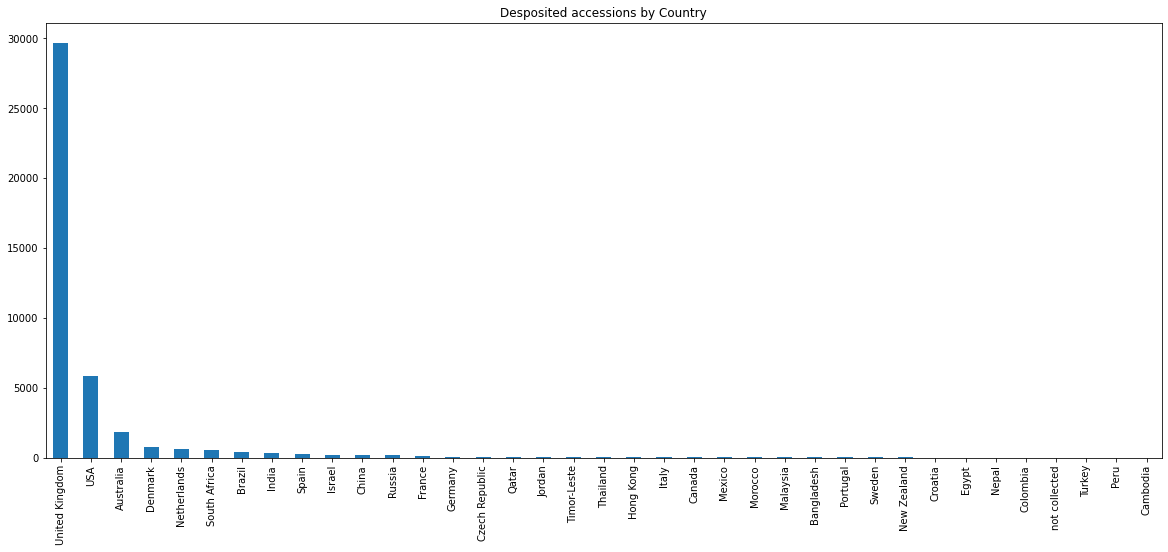

In [12]:
df.country.str.replace(':.*', '').value_counts().plot(kind='bar', figsize=(20, 8)).set_title("Desposited accessions by Country")

In [13]:
df['sex'] = df.apply(axis=1, func=lambda row: row['host_sex'] or row['submitted_host_sex'])
df.sex.value_counts()

male      1722
female    1684
Name: sex, dtype: int64

In [14]:
df.isolation_source.value_counts()

nasopharyngeal swab                                                                     2158
human                                                                                   1212
patient isolate                                                                          653
not collected                                                                            584
nasopharyngeal swabs                                                                     584
nasal swab                                                                               458
not provided                                                                             334
Oro-pharyngeal swab                                                                      304
Nasopharyngeal/oropharyngeal swab                                                        300
nasopharyngeal                                                                           258
not collected&apos;                                                   

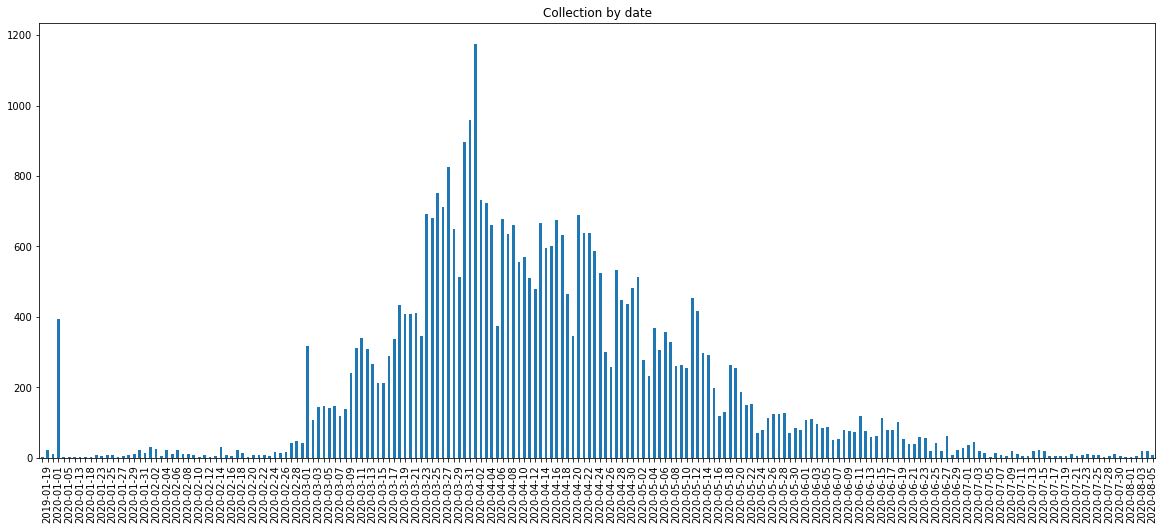

In [15]:
ax = df.collection_date.value_counts().sort_index().plot(kind='bar', figsize=(20, 8))
ax.set_title('Collection by date')
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)